# Prueba Claro
## Frank Montenegro - frandak2@gmail.com

In [34]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from libpysal.cg import alpha_shape_auto
from libpysal.weights.distance import get_points_array
import libpysal
import esda

In [21]:
# import os
g = os.getcwd()
g
path = r'D:\repos\PRUEBA_GEO'
os.chdir(path)

In [13]:
Comparendos = gpd.read_file("data/Comparendos_2019_Bogota_D_C-shp/comparendos_corregido.shp")


In [27]:
Comparendos['MES'] = pd.Categorical(Comparendos['MES'], categories=[ 'ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE'], ordered=True)

In [14]:
##lectura de localidades
local_BGT = gpd.read_file('data\localidades\localidades.shp')
# local_BGT.to_crs(epsg=3116, inplace=True)
local_BGT = local_BGT[['NOMBRE','geometry']]
local_BGT.columns = ['LOCALIDAD','geometry']
local_BGT.head(5)

,LOCALIDAD,geometry
0,SANTA FE,"POLYGON ((100996.362 103506.019, 101013.606 10..."
1,PUENTE ARANDA,"POLYGON ((95475.458 104555.873, 95837.202 1049..."
2,CIUDAD BOLIVAR,"POLYGON ((91716.740 100390.427, 91714.771 1003..."
3,BARRIOS UNIDOS,"POLYGON ((102251.610 110024.092, 101669.946 10..."
4,SUBA,"POLYGON ((103891.168 125935.111, 103894.608 12..."


In [77]:
df = pd.pivot_table(Comparendos, values='CANTIDAD',columns='MES',index='LOCALIDAD', aggfunc=np.sum).reset_index()
df

MES,LOCALIDAD,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
0,ANTONIO NARIÑO,1358,710,791,598,735,400,107,462,642,673,145,151
1,BARRIOS UNIDOS,2749,2620,3194,2824,2913,1602,428,955,1236,1329,389,418
2,BOSA,2291,1740,2919,2321,2969,1727,498,1485,1707,1996,245,222
3,CANDELARIA,307,177,303,387,339,215,63,207,274,271,86,75
4,CHAPINERO,4692,3494,5212,4681,4995,3699,1213,2547,2907,3244,780,892
5,CIUDAD BOLIVAR,1204,672,1031,1411,1633,1070,439,987,984,1192,146,91
6,ENGATIVA,2834,2082,2562,2710,3247,1791,493,1485,1946,2289,541,354
7,FONTIBON,4307,1866,3851,5175,6159,3739,1153,4284,4307,4937,430,462
8,KENNEDY,4622,1888,3081,3749,4238,2527,696,1937,2694,3299,633,725
9,LOS MARTIRES,4652,2078,4845,6400,5911,3722,1114,2902,3666,3800,1224,2135


In [78]:
df = df.merge(local_BGT,how='inner', on='LOCALIDAD')#unimos la geometria con la la localidad correspondiente
gdf = gpd.GeoDataFrame(df)# se transforma a geopd
gdf

,LOCALIDAD,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE,geometry
0,ANTONIO NARIÑO,1358,710,791,598,735,400,107,462,642,673,145,151,"POLYGON ((94092.947 99681.858, 94269.388 99673..."
1,BARRIOS UNIDOS,2749,2620,3194,2824,2913,1602,428,955,1236,1329,389,418,"POLYGON ((102251.610 110024.092, 101669.946 10..."
2,BOSA,2291,1740,2919,2321,2969,1727,498,1485,1707,1996,245,222,"POLYGON ((87997.629 105621.791, 88093.812 1053..."
3,CANDELARIA,307,177,303,387,339,215,63,207,274,271,86,75,"POLYGON ((101257.966 100768.507, 101258.450 10..."
4,CHAPINERO,4692,3494,5212,4681,4995,3699,1213,2547,2907,3244,780,892,"POLYGON ((102251.610 110024.092, 102811.332 10..."
5,CIUDAD BOLIVAR,1204,672,1031,1411,1633,1070,439,987,984,1192,146,91,"POLYGON ((91716.740 100390.427, 91714.771 1003..."
6,ENGATIVA,2834,2082,2562,2710,3247,1791,493,1485,1946,2289,541,354,"POLYGON ((94467.113 115606.642, 94463.029 1157..."
7,FONTIBON,4307,1866,3851,5175,6159,3739,1153,4284,4307,4937,430,462,"POLYGON ((91349.527 113469.012, 91426.279 1134..."
8,KENNEDY,4622,1888,3081,3749,4238,2527,696,1937,2694,3299,633,725,"POLYGON ((91005.069 107357.708, 91018.543 1073..."
9,LOS MARTIRES,4652,2078,4845,6400,5911,3722,1114,2902,3666,3800,1224,2135,"POLYGON ((100522.914 102123.105, 100491.468 10..."


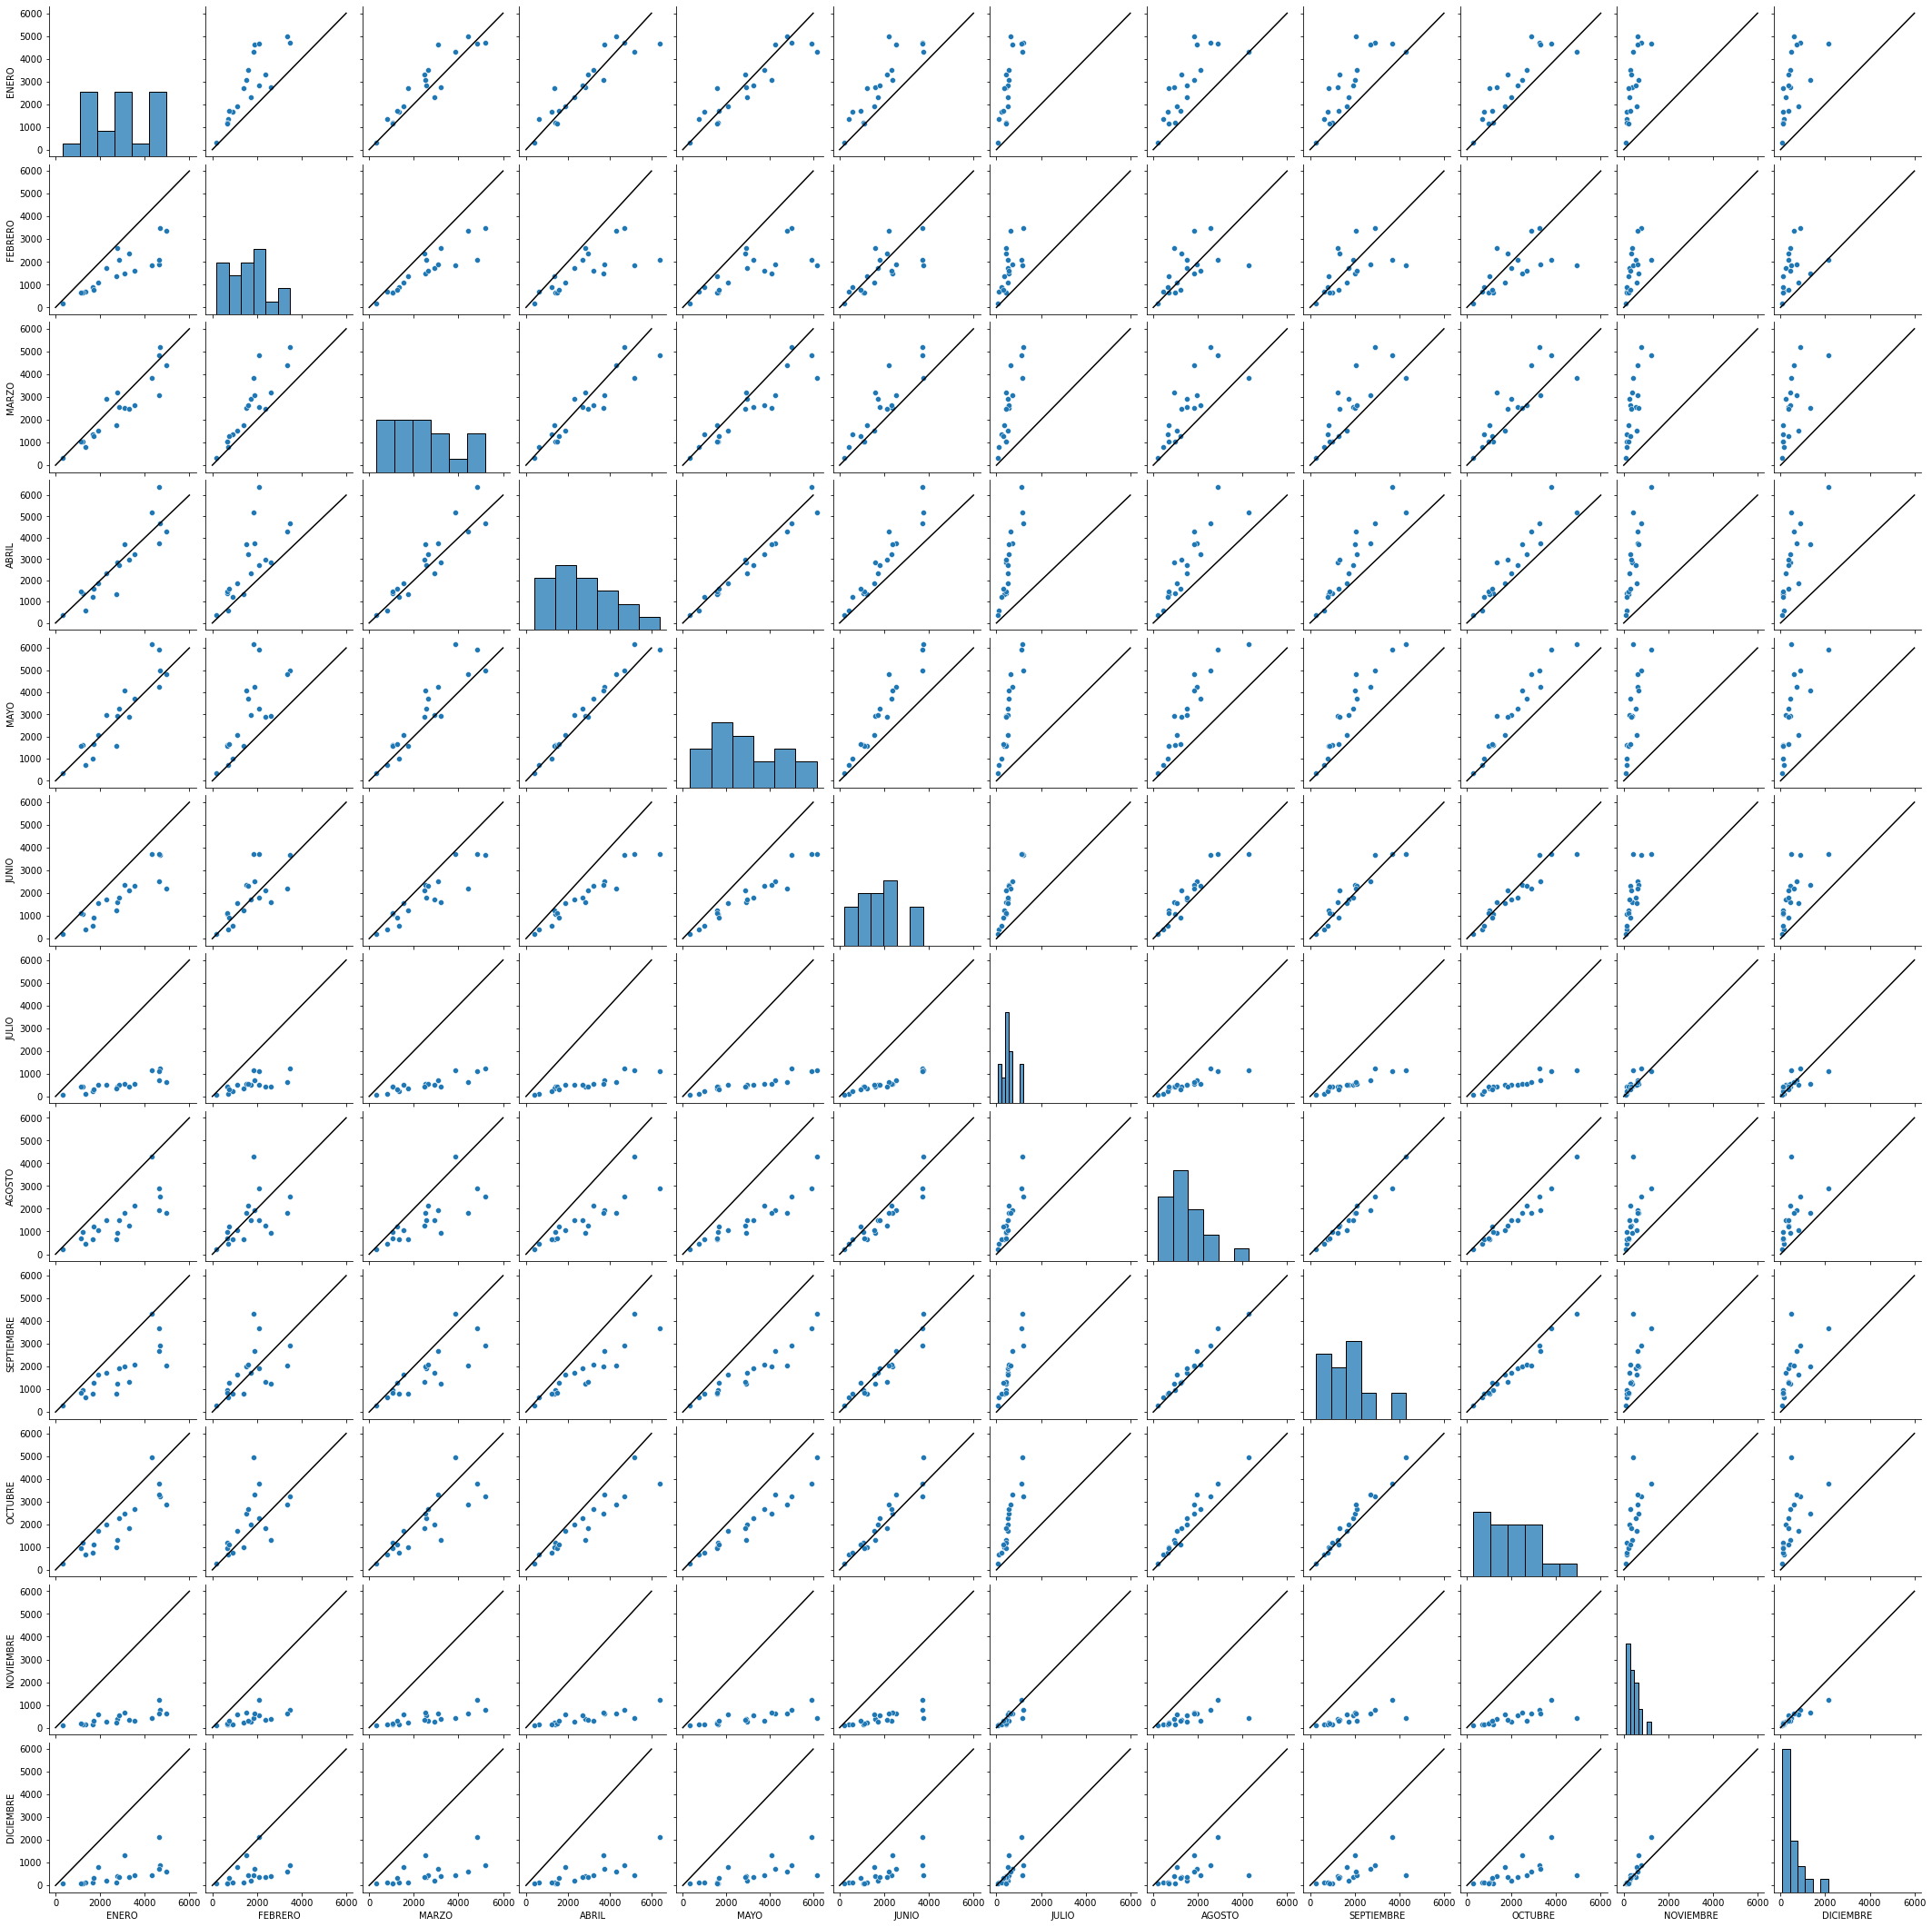

In [79]:
import seaborn as sns
facets = sns.pairplot(data=gdf)
facets.map_offdiag(lambda *arg, **kw: plt.plot((0,6000),(0,6000), color='k'))

In [80]:
new_df = gdf.drop(columns=['LOCALIDAD','geometry'])
new_df

,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
0,1358,710,791,598,735,400,107,462,642,673,145,151
1,2749,2620,3194,2824,2913,1602,428,955,1236,1329,389,418
2,2291,1740,2919,2321,2969,1727,498,1485,1707,1996,245,222
3,307,177,303,387,339,215,63,207,274,271,86,75
4,4692,3494,5212,4681,4995,3699,1213,2547,2907,3244,780,892
5,1204,672,1031,1411,1633,1070,439,987,984,1192,146,91
6,2834,2082,2562,2710,3247,1791,493,1485,1946,2289,541,354
7,4307,1866,3851,5175,6159,3739,1153,4284,4307,4937,430,462
8,4622,1888,3081,3749,4238,2527,696,1937,2694,3299,633,725
9,4652,2078,4845,6400,5911,3722,1114,2902,3666,3800,1224,2135


In [107]:
import libpysal as lp
w = lp.weights.Queen.from_dataframe(gdf)### Calculo matrix de pesos usan la configuracion tipo reina, aqui calcula los pesos en todas las direcciones

In [108]:
import esda
np.random.seed(1)
cor_moran = []
for col in new_df.columns:
    corI = esda.moran.Moran(gdf[col], w)
    cor_moran.append([col,corI.I,corI.p_norm , corI.z_norm])
cor_moran = pd.DataFrame(cor_moran)
cor_moran.columns = ['MES','COR_MORAN-I','valor_P','Z_score']
cor_moran

,MES,COR_MORAN-I,valor_P,Z_score
0,ENERO,0.292993,0.013721,2.464483
1,FEBRERO,0.466160,0.000225,3.688892
2,MARZO,0.322973,0.007440,2.676459
3,ABRIL,0.310219,0.009702,2.586280
4,MAYO,0.373310,0.002426,3.032373
5,JUNIO,0.244044,0.034143,2.118377
6,JULIO,0.087754,0.310916,1.013301
7,AGOSTO,0.186753,0.086659,1.713293
8,SEPTIEMBRE,0.180192,0.095535,1.666897
9,OCTUBRE,0.295410,0.013081,2.481567


## outocorrelacion - MORAN-I - LOCALIDADES
### - el mes de mayor outocorrelacion es FEBRERO con 0.47, lo que nos indica que hay un agrupamiento de datos espaciales en este mes por localidad. 
### - la correlacion baja despues de julio confirmando lo que habiamos evidenciado anteriormente de la disminucion de comparendos en estos meses.
## Valor P y Z score
### - Los meses de enero a junio y octubre rechazan la H0, afirmando que hay patron de distribucion de comparendos en las localidades de bogota en estos meses


# PODEMOS REPLICAR ESTE ANALISIS POR BARRIO, haciendo un overlay entre los puntos y los barrios, lo mas probable es que esta correlacion aumente ya que la matrix de pesos tendra informacion mas detallada.